# Inciso a

El objetivo es encontrar el minimizador de la siguiente función:


$\Large f = (x1 - 4)^4 + (x2 - 3)^2 + 4\times(x3 + 5)^4$  

## Datos:  
  
En este inciso se cuenta con los valores de los $\alpha$'s y el valor de $x_0 = [4,2,-1]$.

## Procedimiento  
  
- Se utiliza el método del <b>descenso del gradiente</b> para encontrar el punto (o vector) $[x_1, x_2, x_3]$ que minimiza la función $f(x_1, x_2, x_3)$   
  
## Algoritmo  

- Se utiliza la siguiente regla para encontrar los valores óptimos de $x$  
    
- $\Large x_{new} = x_{old} - \alpha \nabla f(x_{old})$  
$\alpha$ --> es el paso utilizado en el método que define cuan rápido o lento se llega al mínimo.  

<br>

<b>NOTA:</b> Al conocer los valores de los $\alpha$'s y el valor de $x_0$ se procede con los cálculos y se obtiene el punto minimizador objetivo.

## Método del Paso Descendente

In [61]:
def update_x(x_old, alpha_old, grad_old):
    x_new = x_old - (alpha_old * grad_old) 
    return x_new

## Función para evaluar gradiente en punto específico

In [62]:
import numpy as np

def eval_grad(grad_f, x):
    # Evalúa el gradiente en el punto dado en asignando los valores de los símbolos correspondientes
    return np.array([float(g.subs({'x1': x[0], 'x2': x[1], 'x3': x[2]})) for g in grad_f])

## Definición de variables y funciones

In [63]:
from sympy import *

# Definir las variables simbólicas
x1, x2, x3 = symbols('x1 x2 x3')

# Definir el número de símbolos usados
num_symbs = 3

# Definir la función objetivo
f = (x1 - 4)**4 + (x2 - 3)**2 + 4*(x3 + 5)**4

# Calcular el gradiente de la función
grad_f = [diff(f, x) for x in (x1, x2, x3)]
grad_f


[4*(x1 - 4)**3, 2*x2 - 6, 16*(x3 + 5)**3]

## Calculando las x(n) de las n iteraciones

In [64]:
# Definir punto inicial y tamaño de los pasos
x0 = np.array([4,2,-1], dtype=float)
alpha = [3.967e-3, 0.5, 16.29] 

# Definir la cantidad de iteraciones
n = 3

# Definir una matriz de los valores de x.
x_matrix = np.vstack([x0] + [np.zeros_like(x0) for _ in range(n)])

# Definir una matriz para almacenar los valores de los gradientes.
grads = np.zeros([n,num_symbs])

# Calcular el gradiente y los nuevos puntos en todas las iteraciones
for i in range(n):

    # Evaluar el gradiente en el punto anterior
    grads[i] = eval_grad(grad_f, x_matrix[i])

    # Calcular el valor del nuevo x
    x_matrix[i+1] = np.round(update_x(x_matrix[i], alpha[i], grads[i]), 4)
    
    if i < (n-1):
        print(f'Iteración #{i+1}:\n' 
              f'X usada = {x_matrix[i]} \n'
              f'Alpha usada = {alpha[i]}\n'
              f'Gradiente usado = {grads[i]}\n'
              f'X calcualda = {x_matrix[i+1]} \n\n')
    else:
        print(f'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n'
              f'Resultado Final: \n\n'
              f'Iteración #{i+1}:\n' 
              f'X usada = {x_matrix[i]} \n'
              f'Alpha usada = {alpha[i]}\n'
              f'Gradiente usado = {grads[i]}\n'
              f'X calcualda = {x_matrix[i+1]} \n\n')


Iteración #1:
X usada = [ 4.  2. -1.] 
Alpha usada = 0.003967
Gradiente usado = [   0.   -2. 1024.]
X calcualda = [ 4.      2.0079 -5.0622] 


Iteración #2:
X usada = [ 4.      2.0079 -5.0622] 
Alpha usada = 0.5
Gradiente usado = [ 0.         -1.9842     -0.00385027]
X calcualda = [ 4.      3.     -5.0603] 


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Resultado Final: 

Iteración #3:
X usada = [ 4.      3.     -5.0603] 
Alpha usada = 16.29
Gradiente usado = [ 0.         0.        -0.0035081]
X calcualda = [ 4.      3.     -5.0032] 




# Inciso b

El objetivo sigue siendo el mismo: encontrar el minimizador de la siguiente función:

<br>

$\Large f(x_1, x_2, x_3) = (x1 - 4)^4 + (x2 - 3)^2 + 4\times(x3 + 5)^4$  
  
<br>

- Se requiere utilizar el método del <b>paso descendente</b> para lograr una convergencia hacia el punto óptimo de forma más eficiente. Para esto se debe utilizar alguno de los método de optimización disponibles para encontrar los valores óptimos de las $\alpha$'s en este proceso.

## Datos  
  
Esta vez solo se cuenta con el valor de $x_0 = [4,2,-1]$.

## Procedimiento  

1. **Descenso del gradiente:**

    - Se utiliza el método del <b>descenso del gradiente (GD)</b> para encontrar el punto (o vector) $[x_1, x_2, x_3]$ que minimiza la función $f(x_1, x_2, x_3)$  con la siguiente regla de actualización:

    - $\Large x_{new} = x_{old} - \alpha \nabla f(x_{old})$

<br> 

2. **Paso descendente:**

    - En este caso se utiliza el método del <b>paso descendente</b> para encontrar los valores de las $\alpha$'s que permiten converger de forma más rapida al mínimo.

    - Para esto se identifica la función objetivo a utilizar en el método del paso descendente: $\phi(\alpha)$.  

    - $\Large \phi(\alpha) = f(x_{k} - \alpha \nabla f(x_{k}))$  
    $x_{k}$ --> es el punto (o vector) correspondiente a la iteración $k$.  
    
    - En esta función $\phi(\alpha)$ se substituyen los valores de $x_k$ y $\nabla f(x_k)$ en cada iteración del GD para encontrar la función a optimizar. <b>(Los valores de $x_k$ y $\nabla f(x_k)$ van a definir el comportamiento de la función de optimización en cada iteración.)</b>
 
<br>

3. **Definición de la función de optimización a utilizar:**

    - En la 1ra iteración se calcula el argumento de la expresión $f(x_{k} - \alpha \nabla f(x_{k}))$ con $x_0$ = [4,2,-1] y $\nabla f(x_k)$ = [0,-2,1024].

        - Sustituyendo: $f([4,2,-1] - \alpha\times[0,-2,1024])$

        - Simplificando términos: $f([4, 2 + 2\alpha, -(1+1024\alpha)])$

        - Evaluando en $f(x_1, x_2, x_3)$ --> $f(\alpha) = (4-4)^4 + ((2 + 2\alpha)-3)^2 + 4(-(1+1024\alpha) + 5)^4$  
        -->                                              $= 0 + (-1 + 2\alpha)^2 + 4(4 - 1024\alpha)^4$  
        -->                                              $= (-1 + 2\alpha)^2 + 4(4 - 1024\alpha)^4$  
        
        - Lo que nos lleva a la expresión final de la función de optimización:

        - $\Large \phi(\alpha) = (-1 + 2\alpha)^2 + 4(4 - 1024\alpha)^4$ 

## Utilizando el método de las secantes

### Iteración #1:

<br> 

1. Primero se definen los valores iniciales de las 2 $\alpha$'s que se van a utilizar como entrada en la 1ra iteración del algoritmo con el <b>método de las secantes</b> para encontrar $\alpha_{0}$.

2. Utilización del <b>método de las secantes</b> para encontrar los valores óptimos de las $\alpha$'s. 

    - El objetivo es encontrar los alphas que hacen que $\phi'(\alpha)$ tienda a 0.

    - Se define $\phi'(\alpha)$ como:
      
    - $\Large \phi'(\alpha) = -4 + 8\alpha - 16384(4 - 1024\alpha)^3$ 

    - Se caclula el valor óptimo de $\alpha$ para la iteración $k$ (en este caso por ser la 1ra iteración corrsponde a $\alpha_{0}$) usando la siguiente fórmula definida por el <b>método de las secantes</b>:

    - $\Large \alpha_{k+1} = \alpha_{k} - \frac{\phi'(\alpha_{k}) * (\alpha_{k} - \alpha_{(k-1)})}{\phi'(\alpha_{k}) - \phi'(\alpha_{(k-1)})}$

    - Con esto se obtiene el valor óptimo de $\alpha$ el cual se puede usar en la regla de actualización del <b>GD</b>.


## Utilizando el método de Newton

### Iteración #1:

<br> 

1. Primero se definen el valor inicial de $\alpha$ que se va a utilizar como entrada en la 1ra iteración del algoritmo con el <b>método de Newton</b> para encontrar $\alpha_{0}$.

2. Utilización del <b>método de Newton</b> para encontrar los valores óptimos de las $\alpha$'s. 

    - El objetivo es encontrar los alphas que hacen que $\phi'(\alpha)$ tienda a 0.

    - Se define $\phi'(\alpha)$ como:
      
    - $\Large \phi'(\alpha) = -4 + 8\alpha - 16384(4 - 1024\alpha)^3$ 

    - Se define $\phi''(\alpha)$ como:
      
    - $\Large \phi''(\alpha) = 8 + 50.33\times10^6(4 - 1024\alpha)^2$ 

    - Se caclula el valor óptimo de $\alpha$ para la iteración $k$ (en este caso por ser la 1ra iteración corrsponde a $\alpha_{0}$) usando la siguiente fórmula definida por el <b>método de Newton</b>:

    - $\Large \alpha_{k+1} = \alpha_{k} - \frac{\phi'(\alpha_{k}) } {\phi''(\alpha_{k}) }$

    - Con esto se obtiene el valor óptimo de $\alpha$ el cual se puede usar en la regla de actualización del <b>GD</b>.

<br>

<b>NOTA:</b> Se procede con los cálculos de la misma manera en todas las iteraciones hasta obtener el valor de $x$ que minimiza la función $f(x_1,x_2,x_3)$.

## Método de las secantes

### Condiciones inciales ($x_0, \nabla f(x_0)$)

In [65]:
# Definición la variable simbólica alpha
alpha_syn = symbols('alpha')

# Definir punto inicial y tamaño de los pasos
x0 = np.array([4,2,-1], dtype=float)

# Evaluar el gradiente en el punto inicial
grad0 = eval_grad(grad_f, x0)

### Enocntrar valor inicial de alpha (Quitar, Empezar con 0)

Basado en este resultado puedo ver que la mayor influencia en la variación está en la variable "x3" por lo tanto elijo un paso de 10^-3 para disminuir considerablemente ese cambio en el valor del gradiente con respecto a x3.

In [66]:
# Creo un arreglo de valores de alpha para a través d eun análsisis heurístico identificar el valor óptimo para alpha0 
alphas_test = np.arange(0.0025, 0.0050, 0.0001) 
"""
    Luego de varias visualizaciones y ajustes en los limites y pasos este es el que mejor permite observar 
    el mínimo del gradiente.
"""

# Arreglo para guardar los valores absolutos de los gradientes calculados.
abs_grad = np.zeros(alphas_test.shape)

# Calcular las normas de los gradientes calculados con diferentes valores de alpha.
i = 0
for a in alphas_test:
    # Calcular la nueva x segun el valor actual de alpha
    x_test = update_x(x0, a, grad0)

    # Evaluar el gradiente en el punto calculado
    grad_test = eval_grad(grad_f, x_test)

    # Calcular la norma del gradiente calculado
    abs_grad[i] = np.linalg.norm(grad_test)
    i += 1

#### Grafico los valores de las normas del gradiente evaluado con los valores de alpha para hacer un análisis heurístico.

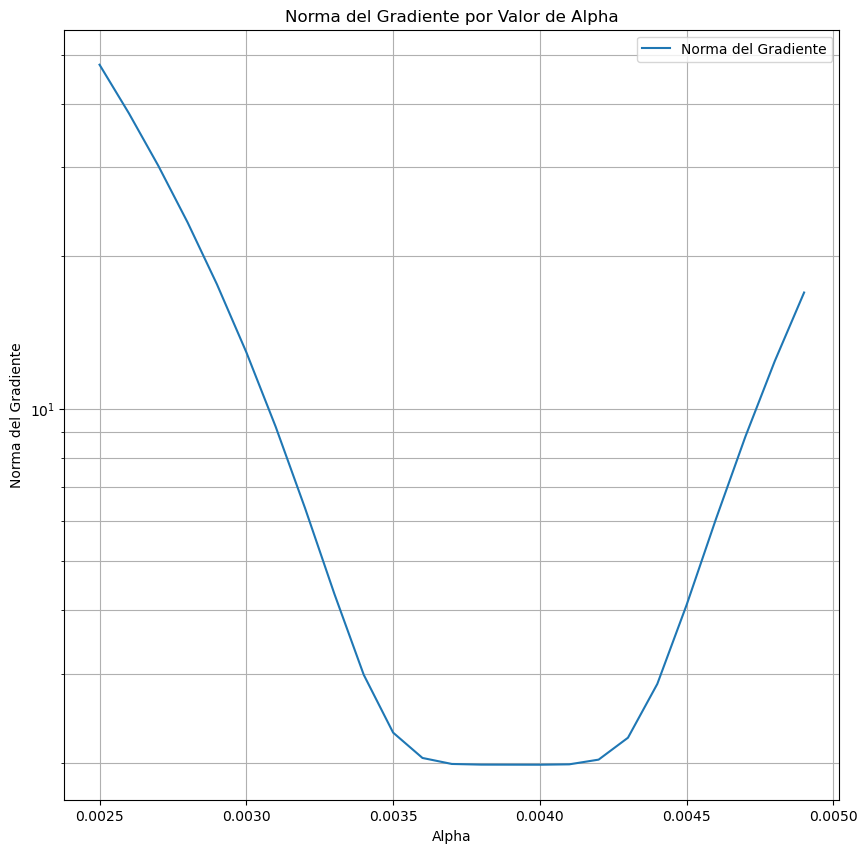

In [67]:
import matplotlib.pyplot as plt

# Graficar
""""
    Utilicé la escala logarítmica para una mejor visualización.
"""
plt.figure(figsize=(10, 10))
plt.plot(alphas_test, abs_grad, label='Norma del Gradiente')
plt.xlabel('Alpha')
plt.ylabel('Norma del Gradiente')
plt.title('Norma del Gradiente por Valor de Alpha')
plt.yscale('log')  # Establecer la escala logarítmica para el eje Y
plt.legend()
plt.grid(True, which="both", ls="-")  # Grid para ambas escalas, lineal y logarítmica
plt.show()

La gráfica muestra que el valor óptimo de alpha0 se encuentra entre 3.5e-3 hasta 4.3e-3.  

### Definición de las funciones a utilizar

#### Función principal $f(x_1,x_2,x_3)$ de forma numérica

In [68]:
# Definición de la función original de forma numérica 
def f_numeric(x):
    # Desempaquetar x en sus componentes
    x1, x2, x3 = x
    return (x1 - 4)**4 + (x2 - 3)**2 + 4*(x3 + 5)**4

#### Función para obtener $\phi'(\alpha)$ a partir de $x_k$ y $\nabla f(x_k)$

In [86]:
# Definir la función que devuelve la expresión de phi(alpha) dadas x_k y grad_f(x_k)
def get_phi_alpha_dev(x_k, grad_f_x_k):
    
    # Converting number to Rational format to avoid float issues with Sympy.
    x_k = Array([Rational(x_k[0]), Rational(x_k[1]), Rational(x_k[2])])  
    grad_f_x_k = Array([Rational(grad_f_x_k[0]), Rational(grad_f_x_k[1]), Rational(grad_f_x_k[2])])

    # Variables simbólicas para representar los componentes de x_k actualizados
    x1_alpha, x2_alpha, x3_alpha = x_k - alpha_syn * grad_f_x_k

    # Obtain phi(alpha)
    phi_alpha = f.subs([(x1, x1_alpha), (x2, x2_alpha), (x3, x3_alpha)])

    # Obtain phi'(alpha)
    phi_alpha_dev = diff(phi_alpha, alpha_syn)

    return phi_alpha, phi_alpha_dev

# Obtener la expresión de phi(alpha) para los valores dados
_, phi_alpha_dev = get_phi_alpha_dev(x0, grad0)
phi_alpha_dev

8*alpha - 16384*(4 - 1024*alpha)**3 - 4

### Función del método de las secantes para encontrar alpha

In [87]:
# Implementación ajustada del método de las secantes
def secant_method_for_alpha(x_k, grad_f_x_k, alpha0, alpha1, tol=1e-10, max_iter=1000):
    
    # Obtener la expresión de phi'(alpha) para los valores actuales
    _, phi_alpha_dev_expr = get_phi_alpha_dev(x_k, grad_f_x_k)

    # Convertir expresion en una función de Python
    """
        lambdify() -->  convierte una expresión simbólica en una función de Python.
            Params:
                alpha_syn --> variable.
                'numpy' --> permite que la función sea compatible con operaciones tipos de 
                            datos de NumPy.
    """
    phi_alpha_dev_func = lambdify(alpha_syn, phi_alpha_dev_expr, 'numpy')
    
    # Iteraciones del método de las secantes 
    for i in range(max_iter):
        
        # Definición de los elementos usados en la ecuación para encontrar el valor del nuevo alpha.
        phi0 = phi_alpha_dev_func(alpha0)
        phi1 = phi_alpha_dev_func(alpha1)
        
        # Calculo del siguiente alpha usando la fórmula de las secantes
        alpha_next = alpha1 - phi1 * (alpha1 - alpha0) / (phi1 - phi0)
        
        # Verificación de la condición de parada
        if abs(alpha_next - alpha1) < tol:
            print(f'Alpha óptimo = {round(alpha_next, 6)} encontrado en iteración {i+1}.')
            return round(alpha_next, 6)
        
        # En caso de no haber encontrado el óptimo actualizar los alphas 
        alpha0, alpha1 = alpha1, alpha_next
    
    # En el peor caso de no encontrar el alpha óptimo
    print('El método de las secantes recorrió todas las iteraciones sin encontrar el óptimo.')
    return round(alpha_next, 6)

### Cálculo de las alpha y los puntos X desconocidos.

In [88]:
# Definición de valores iniciales de los alphas de entrada en el método de las secantes.
alpha_minus2 = 0  
alpha_minus1 = 1.e-5

# Definición de la cantidad de iteraciones
n = 5

# Definición de la matriz para almacenar los valores de x.
x_matrix = np.vstack([x0] + [np.zeros_like(x0) for _ in range(n)])

# Definir una matriz para almacenar los valores de los gradientes.
grads = np.vstack([grad0] + [np.zeros_like(grad0) for _ in range(n)])

# Definir una matriz para almacenar los valores de las alphas.
alphas = [alpha_minus2, alpha_minus1]

# Calcular el gradiente y los nuevos puntos en todas las iteraciones
for i in range(n):

    print(f'Iteración #{i}:\n')

    # Evaluar el gradiente en el punto anterior
    #grads[i] = eval_grad(grad_f, x_matrix[i])

    # Cálculo del alpha óptimo mediante el método de las secantes.
    alpha_new = secant_method_for_alpha(x_matrix[i], grads[i], alphas[i], alphas[i+1])
    alphas.append(alpha_new)

    # Calcular el valor del nuevo x
    x_matrix[i+1] = np.round(update_x(x_matrix[i], alphas[i+2], grads[i]), 4)

    #print(f'Iteración #{i+1}: \ngrad = {grads[i]}\nx = {x_matrix[i]} \nalphas = {alphas[1:]}\n')

    #if np.linalg.norm(grads[i]) > 1.0e-2:
    if f_numeric(x_matrix[i+1]) > 1.0e-10:
        print(f'X usada = {x_matrix[i]} \n'
              f'Alphas usadas en secante = {alphas[i:(i+2)]}\n'
              f'Alpha calculada usada en x_update = {alpha_new}\n'
              f'Gradiente usado = {grads[i]}\n'
              f'X calcualda = {x_matrix[i+1]} \n'
              '----------------------------------------------------------------------------------\n')
    else:
        print(f'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n'
            f'El método convergió en la Iteración #{i+1} con f({x_matrix[i+1]}) = {f_numeric(x_matrix[i+1])}: \n'
            f'X usada = {x_matrix[i]} \n'
            f'Alphas usadas en secante = {alphas[i:(i+2)]}\n'
            f'Alpha calculada usada en x_update = {alpha_new}\n'
            f'Gradiente usado = {grads[i]}\n'
            f'X calcualda = {x_matrix[i+1]} \n')
        break

    # Calcular el gradiente en el punto x encontrado
    grads[i+1] = eval_grad(grad_f, x_matrix[i+1])

Iteración #0:

Alpha óptimo = 0.003967 encontrado en iteración 38.
X usada = [ 4.  2. -1.] 
Alphas usadas en secante = [0, 1e-05]
Alpha calculada usada en x_update = 0.003967
Gradiente usado = [   0.   -2. 1024.]
X calcualda = [ 4.      2.0079 -5.0622] 
----------------------------------------------------------------------------------

Iteración #1:

Alpha óptimo = 0.500002 encontrado en iteración 3.
X usada = [ 4.      2.0079 -5.0622] 
Alphas usadas en secante = [1e-05, 0.003967]
Alpha calculada usada en x_update = 0.500002
Gradiente usado = [ 0.         -1.9842     -0.00385027]
X calcualda = [ 4.      3.     -5.0603] 
----------------------------------------------------------------------------------

Iteración #2:

Alpha óptimo = 17.188793 encontrado en iteración 88.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
El método convergió en la Iteración #3 con f([ 4.  3. -5.]) = 0.0: 
X usada = [ 4.      3.     -5.0603] 
Alphas usadas en secante = [0.003967, 0.500002]
Alpha calcu

### Guardar alphas y vectores x para el próximo inciso

In [72]:
inc_c_alphas = alphas[2:]
inc_c_xs = x_matrix[:(len(x_matrix)-2)]
inc_c_alphas, inc_c_xs

([0.003967, 0.500002, 17.188793],
 array([[ 4.    ,  2.    , -1.    ],
        [ 4.    ,  2.0079, -5.0622],
        [ 4.    ,  3.    , -5.0603],
        [ 4.    ,  3.    , -5.    ]]))

## Método de Newton (No está terminado)

### Definición de la función

In [73]:
# Definir las variables simbólicas
x1, x2, x3 = symbols('x1 x2 x3')

# Definir la función objetivo
f = (x1 - 4)**4 + (x2 - 3)**2 + 4*(x3 + 5)**4

### Evaluar punto x (vector [x1,x2,x3]) en 1ra derivada

### Definición de las derivadas

In [74]:
# from sympy import symbols, diff, hessian, Matrix

# # Punto inicial
# x0 = [4,2,-1]

# # Calcular el gradiente de la función
# grad_f = Matrix([diff(f, x) for x in (x1, x2, x3)])

# # Calcular la matriz Hessiana de la función
# hessian_f = hessian(f, (x1, x2, x3))

# grad_f, hessian_f

### Newton 

In [75]:
# # Ajustamos la función para asegurarnos de que la conversión de tipos sea correcta
# def eval_at_point(grad_f, hessian_f, x_values):
#     # Evalúa el gradiente y la Hessiana en el punto dado sustituyendo los valores de x1, x2, x3
#     grad_evaluated = grad_f.subs({x1: x_values[0], x2: x_values[1], x3: x_values[2]}).evalf()
#     hessian_evaluated = hessian_f.subs({x1: x_values[0], x2: x_values[1], x3: x_values[2]}).evalf()
#     # Convertimos los resultados a arreglos de numpy para cálculos numéricos
#     grad_evaluated = np.array(grad_evaluated).astype(np.float64).flatten()
#     hessian_evaluated = np.array(hessian_evaluated).astype(np.float64)
#     return grad_evaluated, hessian_evaluated

# # Reajustamos la función de Newton para usar correctamente las operaciones de numpy
# def newton_step_for_alpha(alpha, x_k, grad_f, hessian_f):
#     # Evaluar el gradiente y la Hessiana en el punto x_k
#     grad_at_xk, _ = eval_at_point(grad_f, hessian_f, x_k)
    
#     # Evaluar la función phi' para el alpha actual
#     x_new = x_k - alpha * grad_at_xk
#     grad_at_xnew, hessian_at_xnew = eval_at_point(grad_f, hessian_f, x_new)
#     phi_prime = -grad_at_xk @ grad_at_xnew
    
#     # Evaluar la función phi'' para el alpha actual
#     phi_double_prime = grad_at_xk @ (hessian_at_xnew @ grad_at_xk)
    
#     # Calcular el siguiente paso de alpha
#     alpha_next = alpha - (phi_prime / phi_double_prime)
#     return alpha_next.item()  # Convertir el resultado a un escalar Python

# # Intentemos de nuevo el paso de Newton
# newton_step_for_alpha(alpha0, x0, grad_f, hessian_f)


# Inciso c

## Condiciones Iniciales

In [76]:
# Calcular los gradientes
grad0 = eval_grad(grad_f, inc_c_xs[0])
grad1 = eval_grad(grad_f, inc_c_xs[1])
grad2 = eval_grad(grad_f, inc_c_xs[2])

## Alpha 0

In [89]:
# Arreglo de valores de alpha0 
alphas0 = np.arange(0.001, 0.01, 0.0001) 

# Arreglo para guardar los valores de la función phi(alpha) evaluada con los alpha correspondientes.
func_values0 = np.zeros(alphas0.shape)

# Obtener la expresión de phi'(alpha) para los valores actuales
phi_alpha_expr, phi_alpha_dev_expr = get_phi_alpha_dev(inc_c_xs[0], grad0)

# Convertir expresion en una función de Python
phi_alpha_func = lambdify(alpha_syn, phi_alpha_expr, 'numpy')

for i, alpha in enumerate(alphas0):

    # Evaluar phi(alpha) en cada valor alpha
    func_values0[i] = phi_alpha_func(alpha)

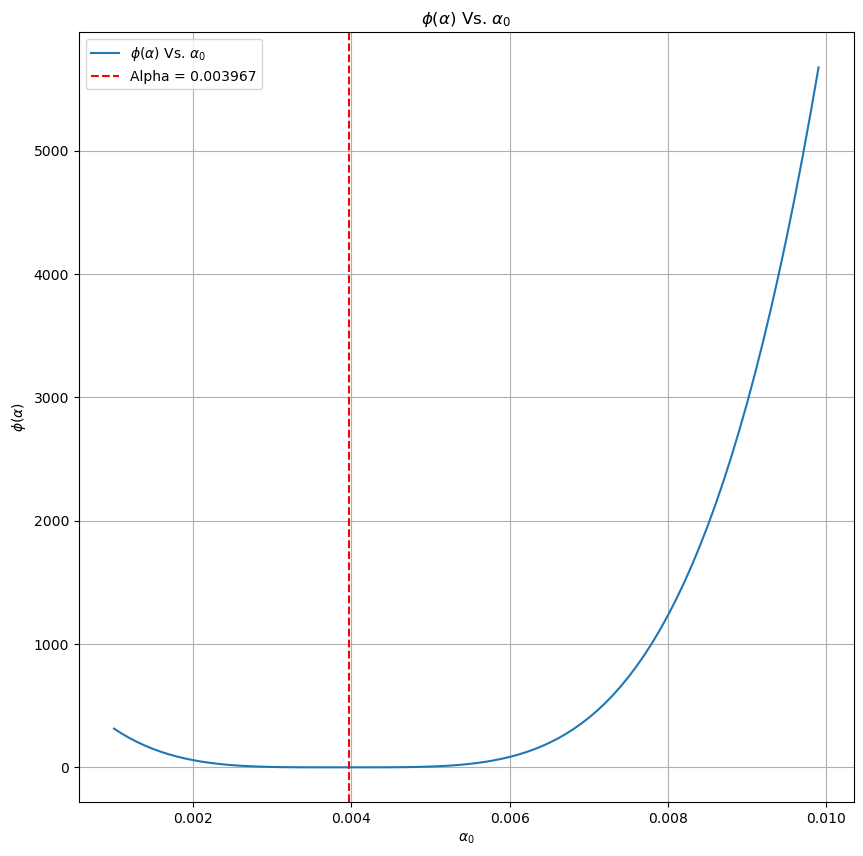

In [90]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(10, 10))
plt.plot(alphas0, func_values0, label=r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_0$')
plt.axvline(x=inc_c_alphas[0], color='r', linestyle='--', label=f'Alpha = {inc_c_alphas[0]}')  # Línea vertical en x=valor_x
plt.xlabel(r'$\alpha_0$')
plt.ylabel(r'$\phi (\alpha)$' )
plt.title(r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_0$')
plt.legend()
plt.grid(True)  # Grid para ambas escalas, lineal y logarítmica
plt.show()

## Alpha 1

In [91]:
# Arreglo de valores de alpha1 
alphas1 = np.arange(0.01, 1, 0.01) 

# Arreglo para guardar los valores de la función phi(alpha) evaluada con los alpha correspondientes.
func_values1 = np.zeros(alphas1.shape)

# Obtener la expresión de phi'(alpha) para los valores actuales
phi_alpha_expr, phi_alpha_dev_expr = get_phi_alpha_dev(inc_c_xs[1], grad1)

# Convertir expresion en una función de Python
phi_alpha_func = lambdify(alpha_syn, phi_alpha_expr, 'numpy')

for i, alpha in enumerate(alphas1):

    # Evaluar phi(alpha) en cada valor alpha
    func_values1[i] = phi_alpha_func(alpha)

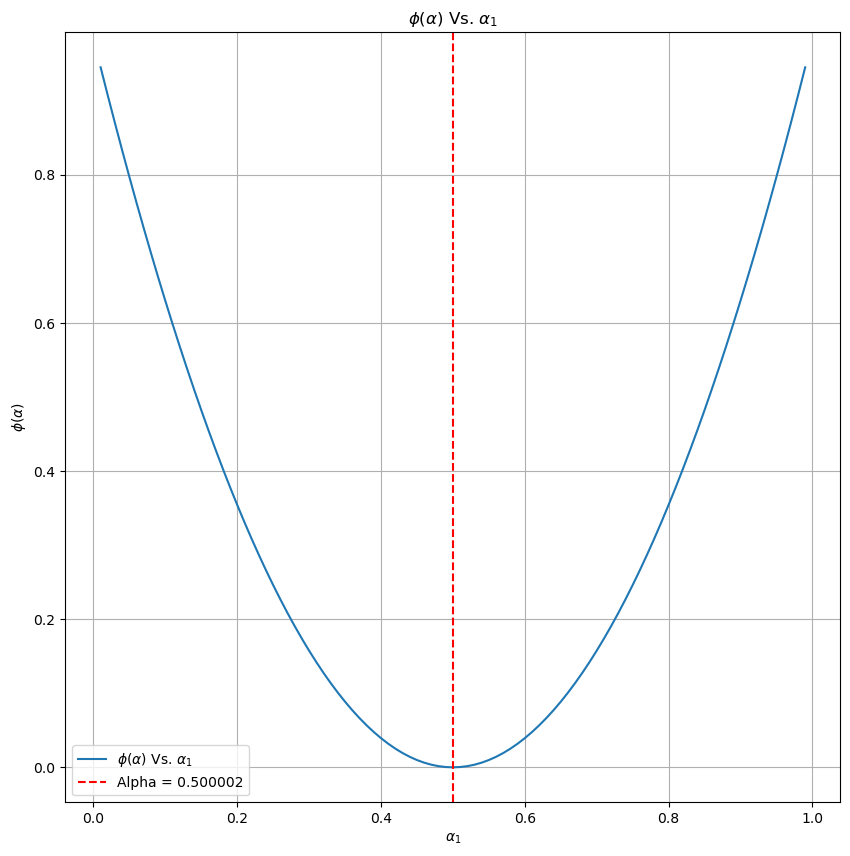

In [92]:
# Graficar
plt.figure(figsize=(10, 10))
plt.plot(alphas1, func_values1, label=r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_1$')
plt.axvline(x=inc_c_alphas[1], color='r', linestyle='--', label=f'Alpha = {inc_c_alphas[1]}')  # Línea vertical en x=valor_x
plt.xlabel(r'$\alpha_1$')
plt.ylabel(r'$\phi (\alpha)$' )
plt.title(r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_1$')
plt.legend()
plt.grid(True)  # Grid para ambas escalas, lineal y logarítmica
plt.show()

## Alpha 2

In [93]:
# Arreglo de valores de alpha2 
alphas2 = np.arange(10, 21, 1) 

# Arreglo para guardar los valores de la función phi(alpha) evaluada con los alpha correspondientes.
func_values2 = np.zeros(alphas2.shape)

# Obtener la expresión de phi'(alpha) para los valores actuales
phi_alpha_expr, phi_alpha_dev_expr = get_phi_alpha_dev(inc_c_xs[2], grad2)

# Convertir expresion en una función de Python
phi_alpha_func = lambdify(alpha_syn, phi_alpha_expr, 'numpy')

for i, alpha in enumerate(alphas2):

    # Evaluar phi(alpha) en cada valor alpha
    func_values2[i] = phi_alpha_func(alpha)

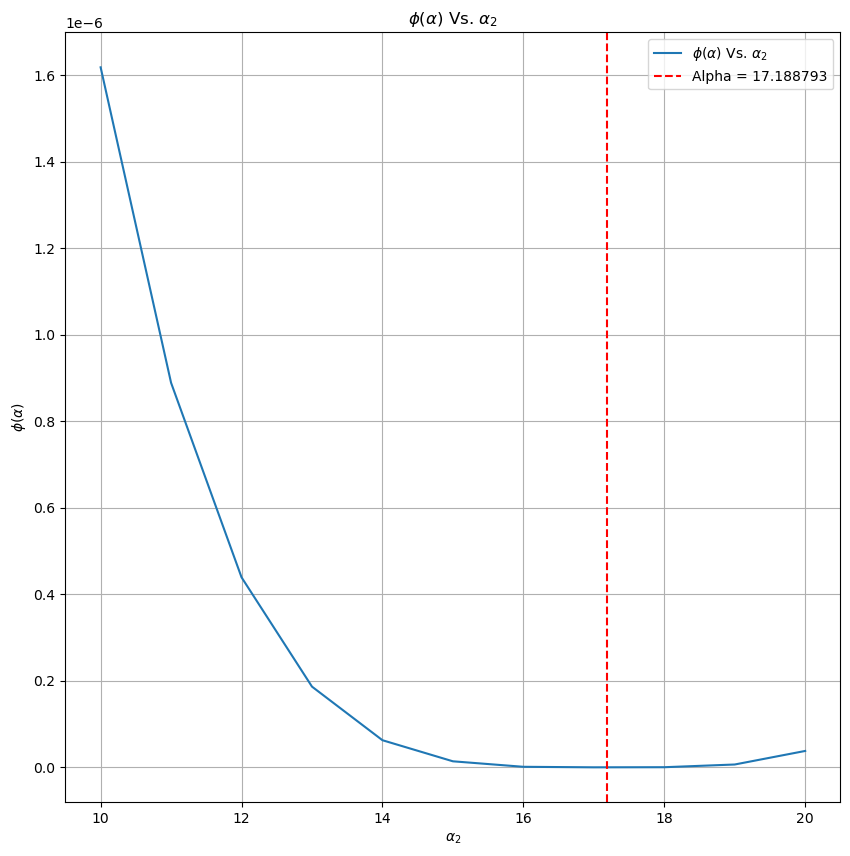

In [94]:
# Graficar
plt.figure(figsize=(10, 10))
plt.plot(alphas2, func_values2, label=r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_2$')
plt.axvline(x=inc_c_alphas[2], color='r', linestyle='--', label=f'Alpha = {inc_c_alphas[2]}')  # Línea vertical en x=valor_x
plt.xlabel(r'$\alpha_2$')
plt.ylabel(r'$\phi (\alpha)$' )
plt.title(r'$\phi (\alpha)$' ' Vs. ' r'$\alpha_2$')
plt.legend()
plt.grid(True)  # Grid para ambas escalas, lineal y logarítmica
plt.show()